In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
ls

gdrive/  sample_data/


In [ ]:
import os, shutil

TRAINDIR = 'gdrive/MyDrive/ee_628/proj/train/'
cat_folder = 'cat/'
dog_folder = 'dog/'



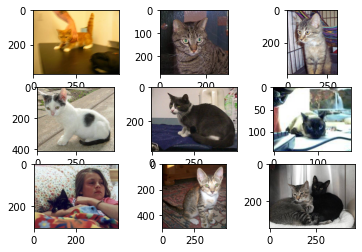

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt

for i in range(9):
  plt.subplot(330 + 1 + i)
  filename = TRAINDIR+cat_folder + 'cat.' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()


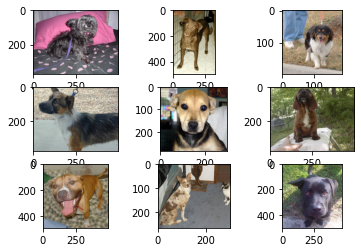

In [ ]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  filename = TRAINDIR+dog_folder + 'dog.' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 10,
                             shear_range=0.2,
                             rescale=1./255,
                             validation_split=0.25)

IMG_H = 150
IMG_W = 150

In [ ]:
train_generator = datagen.flow_from_directory(TRAINDIR,
                                              target_size=(IMG_H, IMG_W),
                                              batch_size=100,
                                              class_mode='binary',
                                              subset='training')


Found 18750 images belonging to 2 classes.


In [ ]:
val_generator = datagen.flow_from_directory(TRAINDIR,
                                            target_size=(IMG_H, IMG_W),
                                            batch_size=100,
                                            class_mode='binary',
                                            subset='validation')

Found 6250 images belonging to 2 classes.


In [ ]:
test_generator = datagen.flow_from_directory('gdrive/MyDrive/ee_628/proj/', classes=['test1'],
                                             target_size=(IMG_H, IMG_W))

Found 12500 images belonging to 1 classes.


# Let us build the models now:

# 1. CNN - AlexNet

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization

In [ ]:
model1 = Sequential()
model1.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(IMG_H, IMG_W, 3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model1.add(Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model1.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model1.add(Flatten())
model1.add(Dense(4096, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(4096, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1,activation='sigmoid'))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 35, 35, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 35, 35, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 17, 17, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       24832     
_________________________________________________________________
batch_normalization_1 (Batch (None, 17, 17, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 384)         8

In [ ]:
model1.compile(loss='binary_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy'])

In [ ]:
history1 = model1.fit_generator(train_generator, validation_data=val_generator, epochs=20)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
188/188 [==============================] - 767s 4s/step - loss: 3.0391 - accuracy: 0.5557 - val_loss: 0.7374 - val_accuracy: 0.5019
Epoch 2/20
188/188 [==============================] - 769s 4s/step - loss: 0.6340 - accuracy: 0.6525 - val_loss: 0.6521 - val_accuracy: 0.5954
Epoch 3/20
188/188 [==============================] - 768s 4s/step - loss: 0.5677 - accuracy: 0.7059 - val_loss: 0.6079 - val_accuracy: 0.6562
Epoch 4/20
188/188 [==============================] - 769s 4s/step - loss: 0.5168 - accuracy: 0.7438 - val_loss: 0.5292 - val_accuracy: 0.7390
Epoch 5/20
188/188 [==============================] - 773s 4s/step - loss: 0.4610 - accuracy: 0.7821 - val_loss: 0.7024 - val_accuracy: 0.5992
Epoch 6/20
188/188 [==============================] - 772s 4s/step - loss: 0.4173 - accuracy: 0.8128 - val_loss: 0.5468 - val_accuracy: 0.7285
Epoch 7/20
188/188 [==============================] - 771s 4s/step - loss: 0.3702 - accuracy: 0.8370 - val_loss: 0.5109 - val_accuracy: 0.7256

In [ ]:
history1.history

{'accuracy': [0.581279993057251,
  0.6680533289909363,
  0.7203199863433838,
  0.7578666806221008,
  0.7865066528320312,
  0.8123733401298523,
  0.8366400003433228,
  0.8461333513259888,
  0.8606933355331421,
  0.8757866621017456,
  0.8866133093833923,
  0.8988266587257385,
  0.9037333130836487,
  0.9158933162689209,
  0.9211199879646301,
  0.9287466406822205,
  0.9341866374015808,
  0.9376533627510071,
  0.946453332901001,
  0.9548799991607666],
 'loss': [1.2163573503494263,
  0.6160514950752258,
  0.5538249015808105,
  0.5033355951309204,
  0.4601360857486725,
  0.4124964475631714,
  0.37251681089401245,
  0.35068026185035706,
  0.32389530539512634,
  0.2941121757030487,
  0.27228933572769165,
  0.24526046216487885,
  0.22917667031288147,
  0.20723243057727814,
  0.19599738717079163,
  0.18444250524044037,
  0.17122133076190948,
  0.16007333993911743,
  0.1418907195329666,
  0.1242319792509079],
 'val_accuracy': [0.5019199848175049,
  0.5953599810600281,
  0.6561599969863892,
  0.739

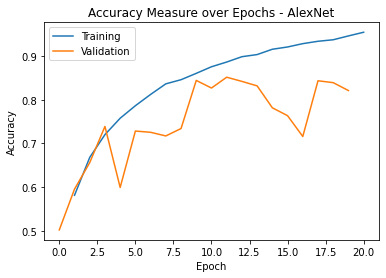

In [ ]:
epochs = [i for i in range(1,21)]

plt.plot(epochs, history1.history['accuracy'], history1.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy Measure over Epochs - AlexNet')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

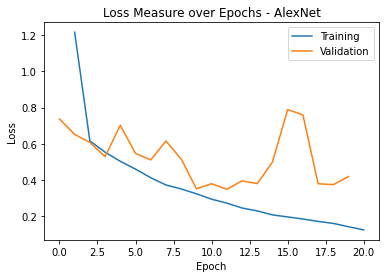

In [ ]:
plt.plot(epochs, history1.history['loss'], history1.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss Measure over Epochs - AlexNet')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
preds_alexnet = model1.predict(test_generator)

In [ ]:
type(preds_alexnet)

numpy.ndarray

In [ ]:
preds_alexnet

array([[0.6375611 ],
       [0.6368668 ],
       [0.06549668],
       ...,
       [0.7978575 ],
       [0.16250959],
       [0.00222257]], dtype=float32)

In [ ]:
class_preds_alexnet = model1.predict_classes(test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
class_preds_alexnet

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int32)

In [ ]:
preds_rounded_alexnet = preds_alexnet

In [ ]:
preds_rounded_alexnet[preds_rounded_alexnet <= 0.5] = 0
preds_rounded_alexnet[preds_rounded_alexnet > 0.5] = 1

In [ ]:
preds_rounded_alexnet

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
preds_lst = [int(i) for i in preds_rounded_alexnet]

In [ ]:
len(preds_lst)

12500

In [ ]:
ids_lst = [i for i in range(1,12501)]

In [ ]:
len(ids_lst)

12500

In [ ]:
import pandas as pd

dct = {'id': ids_lst, 'label': preds_lst}
ans = pd.DataFrame(dct)

In [ ]:
ans.head()

,id,label
0,1,1
1,2,1
2,3,0
3,4,0
4,5,1


In [ ]:
ans.to_csv('alexnet_labels.csv', index=False)

In [ ]:
!cp alexnet_labels.csv "gdrive/MyDrive/ee_628/proj/"

When we used the predict_classes method it appears that the classes assigned a '1' to cats and '0' to dogs and we want it the other way for submission. Therefore for this list, we shall attempt to swap the values for each index in the array. 

In [ ]:
indices_one = class_preds_alexnet == 1
indices_zero = class_preds_alexnet == 0
class_preds_alexnet[indices_one] = 0
class_preds_alexnet[indices_zero] = 1

In [ ]:
class_preds_alexnet

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

Sure enough, we can see by comparing it with earlier value of this array that this is the opposite. 

In [ ]:
preds_classmethod_list = [int(i) for i in class_preds_alexnet]

In [ ]:
len(preds_classmethod_list)

12500

In [ ]:
dct_2 = {'id': ids_lst, 'label': preds_classmethod_list}
ans_2 = pd.DataFrame(dct_2)

In [ ]:
ans_2.head()

,id,label
0,1,1
1,2,1
2,3,1
3,4,0
4,5,1


In [ ]:
ans_2.to_csv('alexnet_labels_usingclassmethod.csv', index=False)

In [ ]:
!cp alexnet_labels_usingclassmethod.csv "gdrive/MyDrive/ee_628/proj/"